In [1]:
# nltk.download_shell()

In [2]:
import pandas as pd

In [3]:
msg = pd.read_csv('smsspamcollection/SMSSpamCollection',sep = '\t',names = ['label','message'])

In [4]:
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
msg.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
msg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
msg['msg_len'] = msg['message'].apply(lambda x: len(x))

In [9]:
msg.head()

,label,message,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


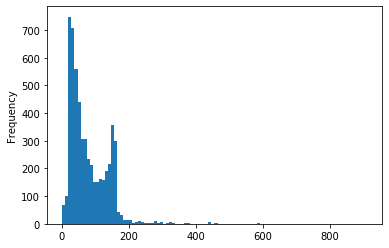

In [10]:
msg['msg_len'].plot.hist(bins = 100)

In [11]:
msg.describe()

,msg_len
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [12]:
msg[msg['msg_len']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B33881C88>,
      dtype=object)

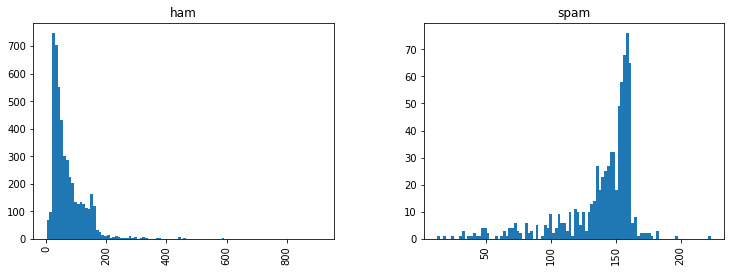

In [13]:
msg.hist(column='msg_len',by='label',bins=100,figsize=(12,4))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = msg['msg_len']
y = msg['label']

In [16]:
msg['pred'] = msg['msg_len'].apply(lambda x: 1 if x>150 else 0 )

In [17]:
msg['bit_label'] = msg['label'].apply(lambda x: 1 if x=='spam' else 0)

In [18]:
msg.head()

,label,message,msg_len,pred,bit_label
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0
1,ham,Ok lar... Joking wif u oni...,29,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,1
3,ham,U dun say so early hor... U c already then say...,49,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(msg['bit_label'],msg['pred']))
print('\n')
print(confusion_matrix(msg['bit_label'],msg['pred']))
      

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4825
           1       0.45      0.48      0.46       747

    accuracy                           0.85      5572
   macro avg       0.69      0.69      0.69      5572
weighted avg       0.86      0.85      0.85      5572



[[4398  427]
 [ 392  355]]


In [51]:
msg.drop(['pred','bit_label'],inplace=True,axis=1)

In [52]:
msg.head()

,label,message,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
msg['bit_label'] = msg['label'].apply(lambda x: 1 if x=='spam' else 0)

In [24]:
error_rate = []

for i in range(30,200):
    pred = []
    error = 0
    for j in msg['msg_len']:
        if j>i:
            pred.append(1)
        else :
            pred.append(0)
    for num,j in enumerate(msg['bit_label']):
        if j!=pred[num]:
            error += 1
    error_rate.append(error)    

Text(0, 0.5, 'Error Rate')

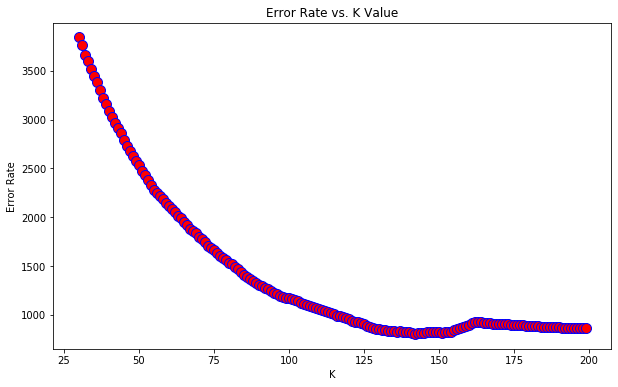

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(30,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
msg['pred'] = msg['msg_len'].apply(lambda x: 1 if x>150 else 0 )

In [27]:
print(classification_report(msg['bit_label'],msg['pred']))
print('\n')
print(confusion_matrix(msg['bit_label'],msg['pred']))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4825
           1       0.45      0.48      0.46       747

    accuracy                           0.85      5572
   macro avg       0.69      0.69      0.69      5572
weighted avg       0.86      0.85      0.85      5572



[[4398  427]
 [ 392  355]]


In [53]:
msg.head()

,label,message,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B33D73388>,
      dtype=object)

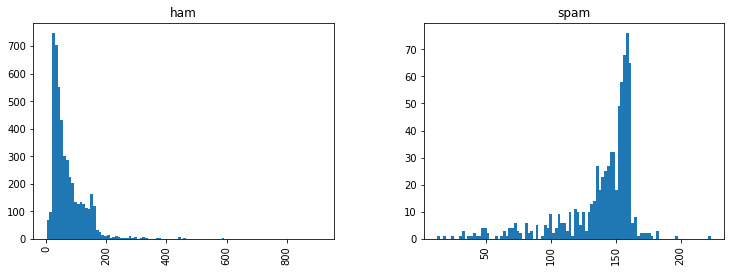

In [29]:
msg.hist(column='msg_len',by='label',bins=100,figsize=(12,4))

In [30]:
import string

In [42]:
mess = 'sample message! Notice: it has punctuation.'

In [43]:
nopunc = [c for c in mess if c not in string.punctuation]

In [44]:
 from nltk.corpus import stopwords

In [45]:
nopunc = ''.join(nopunc)

In [46]:
nopunc

'sample message Notice it has punctuation'

In [47]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [49]:
def text_proses(line):
    
    nopunc = [char for char in line if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    



In [54]:
msg['clean_msg'] = msg['message'].apply(text_proses)

In [55]:
msg.head()

,label,message,msg_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
bow_transformer = CountVectorizer(analyzer=text_proses).fit(msg['message'])

In [58]:
print(len(bow_transformer.vocabulary_))

11425


In [60]:
msg4 = msg['message'][3]

In [61]:
print(msg4)

U dun say so early hor... U c already then say...


In [62]:
bow4 = bow_transformer.transform([msg4])

In [63]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [65]:
bow_transformer.get_feature_names()[9554]

'say'

In [66]:
msg_bow = bow_transformer.transform(msg['message'])

In [67]:
print('Shape of the Sparse Matrix',msg_bow.shape)

Shape of the Sparse Matrix (5572, 11425)


In [68]:
msg_bow.nnz

50548

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

In [70]:
tfidf_transformer = TfidfTransformer().fit(msg_bow)

In [71]:
tfidf4 = tfidf_transformer.transform(bow4)

In [72]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [73]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [74]:
msg_tfidf = tfidf_transformer.transform(msg_bow)

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
spam_detect_model = MultinomialNB().fit(msg_tfidf,msg['label'])

In [77]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [78]:
msg['label'][3]

'ham'

In [79]:
all_pred = spam_detect_model.predict(msg_tfidf)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = msg['message']
y = msg['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
from sklearn.pipeline import Pipeline

In [86]:
pipline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proses)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [87]:
pipline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_proses at 0x0000021B36313D38>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [88]:
predictions = pipline.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.74      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839



[[1593    0]
 [  65  181]]
